<a href="https://colab.research.google.com/github/navya480/classification/blob/main/Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classifications-Mushroom Dataset

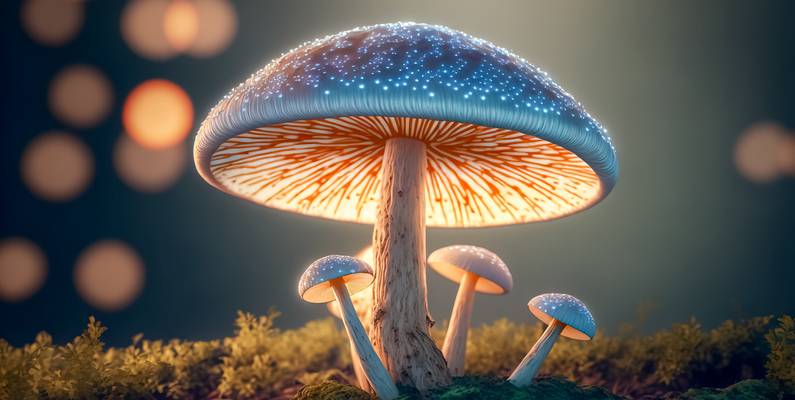

The following topics are covered in this tutorial:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set


### How to run the code

This tutorial is an executable [Jupyter notebook] You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Colab**. You will be prompted to connect your Google Drive account so that this notebook can be placed into your drive for execution.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.



## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to apply _logistic regression_ to a real-world dataset from [Kaggle](https://kaggle.com/datasets):
> **QUESTION**: The [Mushroom Dataset](/content/mushroom_cleaned.csv) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:

>
>


**EXERCISE**: Before proceeding further, take a moment to think about how you can approach this problem. List five or more ideas that come to your mind below:

1. ???
2. ???
3. ???
4. ???
5. ???

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)).

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

## Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.__version__

'0.1.22'

The dataset can now be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

Once the above command is executed, the dataset is downloaded and extracted to the the directory `Mushroom Dataset`.
- Link: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

In [ ]:
mushrooms='/content/mushroom_cleaned.csv'

Let's load the data from `Mushroom Dataset` using Pandas.

In [ ]:
import pandas as pd

In [ ]:
mushroom = pd.read_csv('/content/mushroom_cleaned.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
mushroom

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


The dataset contains over 54035 rows and 9 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `Target Class`.

Let's check the data types and missing values in the various columns.

In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
mushroom.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')

In [ ]:
px.histogram(mushroom, x = 'season',color='class')

In [ ]:
px.histogram(mushroom, x='cap-diameter',color='class')

In [ ]:
px.histogram(mushroom, x='gill-color',color='class')

In [ ]:
px.scatter(mushroom.sample(1000), x='stem-height',y='stem-width',color='class')

In [ ]:
px.scatter(mushroom.sample(3500),
           x= 'gill-color',
           y = 'gill-attachment',
           color = 'class')

<Axes: xlabel='cap-shape', ylabel='cap-diameter'>

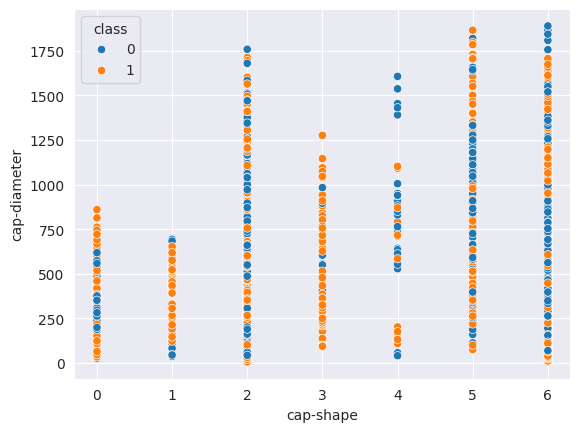

In [ ]:
sns.scatterplot(mushroom.sample(2500),
x="cap-shape",
y="cap-diameter",
hue="class")

In [ ]:
mushroom.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

What interpertations can you draw from the above charts?

> **EXERCISE**: Visualize all the other columns of the dataset and study their relationship with the mushroom  `class` columns.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_df, test_df = train_test_split(mushroom, test_size = 0.2, random_state=42)


In [ ]:
print('train_df.shape:',train_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (43228, 9)
test_df.shape: (10807, 9)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

In [ ]:
mushroom

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [ ]:
mushroom['cap-shape'].unique()

array([2, 6, 4, 0, 1, 5, 3])

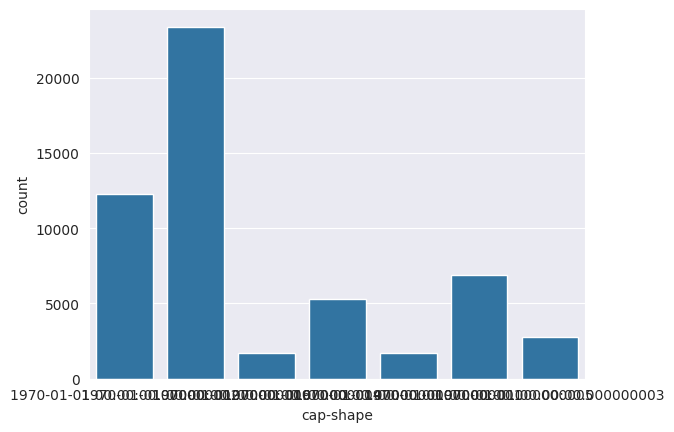

In [ ]:
sns.countplot(x=pd.to_datetime(mushroom['cap-shape']));

In [ ]:
train_df = mushroom[mushroom['cap-shape'].astype(int)<=3]
test_df = mushroom[mushroom['cap-shape' ].astype(int)>3]

In [ ]:
print('train_df.shape:',train_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (22069, 9)
test_df.shape: (31966, 9)


In [ ]:
train_df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
364,1137,2,2,10,2.076607,1574,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54021,82,2,3,2,1.353282,462,12,0.888450,1
54024,74,2,3,2,1.042921,517,12,0.943195,1
54025,70,2,3,2,1.325429,454,12,0.888450,1
54031,82,2,3,2,1.186164,490,12,0.943195,1


In [ ]:
test_df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54028,80,5,3,2,1.054858,412,12,0.888450,1
54029,97,6,3,2,0.509736,527,12,0.943195,1
54030,73,5,3,2,0.887740,569,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1


## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = "class"

In [ ]:
print(input_cols)

['cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']


In [ ]:
target_col

'class'

We can now create inputs and targets for the training and test sets for further processing and model training.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,2,2,10,3.807467,1545,11,1.804273
1,2,2,10,3.807467,1557,11,1.804273
2,2,2,10,3.612496,1566,11,1.804273
6,2,2,10,3.835320,1563,11,1.804273
364,2,2,10,2.076607,1574,11,0.943195
...,...,...,...,...,...,...,...
54021,2,3,2,1.353282,462,12,0.888450
54024,2,3,2,1.042921,517,12,0.943195
54025,2,3,2,1.325429,454,12,0.888450
54031,2,3,2,1.186164,490,12,0.943195


In [ ]:
train_targets

,class
0,1
1,1
2,1
6,1
364,1
...,...
54021,1
54024,1
54025,1
54031,1


Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

['cap-shape',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'season']

In [ ]:
categorical_cols

[]

In [ ]:
train_inputs[numeric_cols].describe()

,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,22069.000000,22069.000000,22069.000000,22069.000000,22069.000000,22069.000000,22069.000000
mean,1.570076,2.210250,6.930309,0.788722,879.317595,8.148579,0.942108
std,0.987388,2.383163,3.360525,0.687306,745.959918,3.292764,0.351813
min,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372
25%,1.000000,0.000000,4.000000,0.274976,269.000000,6.000000,0.888450
50%,2.000000,1.000000,7.000000,0.580507,633.000000,9.000000,0.943195
75%,2.000000,5.000000,10.000000,1.102606,1328.000000,11.000000,0.943195
max,3.000000,6.000000,11.000000,3.835320,3568.000000,12.000000,1.804273


Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [ ]:
train_inputs.nunique()

,0
cap-shape,4
gill-attachment,7
gill-color,12
stem-height,1372
stem-width,2966
stem-color,13
season,4


Let's save our work before continuing.

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [ ]:
mushroom[numeric_cols].isna().sum()

,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0


The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset.

In [ ]:
train_inputs[numeric_cols].isna().sum()

,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0


In [ ]:
imputer.fit(mushroom)

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [ ]:
list(imputer.statistics_)

[567.2572036642916,
 4.000314610900342,
 2.142056074766355,
 7.32950865179976,
 0.7591098098505489,
 1051.0812991579533,
 8.418062366984362,
 0.9521629527084753,
 0.5491810863329324]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [ ]:
train_df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
364,1137,2,2,10,2.076607,1574,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54021,82,2,3,2,1.353282,462,12,0.888450,1
54024,74,2,3,2,1.042921,517,12,0.943195,1
54025,70,2,3,2,1.325429,454,12,0.888450,1
54031,82,2,3,2,1.186164,490,12,0.943195,1


## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [ ]:
mushroom.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [ ]:
scaler.fit(mushroom)

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [ ]:
train_inputs[numeric_cols].describe()

,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,22069.000000,22069.000000,22069.000000,22069.000000,22069.000000,22069.000000,22069.000000
mean,1.570076,2.210250,6.930309,0.788722,879.317595,8.148579,0.942108
std,0.987388,2.383163,3.360525,0.687306,745.959918,3.292764,0.351813
min,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372
25%,1.000000,0.000000,4.000000,0.274976,269.000000,6.000000,0.888450
50%,2.000000,1.000000,7.000000,0.580507,633.000000,9.000000,0.943195
75%,2.000000,5.000000,10.000000,1.102606,1328.000000,11.000000,0.943195
max,3.000000,6.000000,11.000000,3.835320,3568.000000,12.000000,1.804273


Learn more about scaling techniques here: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Let's save our work before continuing

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [ ]:
mushroom.shape

(54035, 9)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [ ]:
encoder.fit(mushroom[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

[]


In [ ]:
test_inputs

,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
3,6,2,10,3.787572,1566,11,1.804273
4,6,2,10,3.711971,1464,11,0.943195
5,6,2,10,3.775635,1520,11,0.943195
7,6,2,10,3.676160,1532,11,0.888450
8,6,2,10,3.771656,1476,11,0.943195
...,...,...,...,...,...,...,...
54028,5,3,2,1.054858,412,12,0.888450
54029,6,3,2,0.509736,527,12,0.943195
54030,5,3,2,0.887740,569,12,0.943195
54032,5,3,2,0.915593,584,12,0.888450


In [ ]:
train_inputs

,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,2,2,10,3.807467,1545,11,1.804273
1,2,2,10,3.807467,1557,11,1.804273
2,2,2,10,3.612496,1566,11,1.804273
6,2,2,10,3.835320,1563,11,1.804273
364,2,2,10,2.076607,1574,11,0.943195
...,...,...,...,...,...,...,...
54021,2,3,2,1.353282,462,12,0.888450
54024,2,3,2,1.042921,517,12,0.943195
54025,2,3,2,1.325429,454,12,0.888450
54031,2,3,2,1.186164,490,12,0.943195


## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

We can train the model using `model.fit`.

In [ ]:
predictions_lg = model.predict(test_inputs)

In [ ]:
test_targets

,class
3,1
4,1
5,1
7,1
8,1
...,...
54028,1
54029,1
54030,1
54032,1


In [ ]:
predictions_lg

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(model.coef_.tolist())

[[-0.018594980608650807, 0.07673309222601467, -0.003862779738574323, 0.6846068314085422, -0.0006146980573040715, 0.0005391422119411725, -0.5570154025104256]]


In [ ]:
print(model.intercept_)

[0.96778107]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_targets, predictions_lg)

0.5591566038916349

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

---



In [ ]:
from sklearn.metrics import confusion_matrix

## Decision tree

A Decision Tree Classifier is a type of algorithm that uses a tree-like structure to classify instances based on their feature values. Each node in the tree represents an instance, branches represent test outcomes, and leaf nodes indicate the class label.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(train_inputs, train_targets)

DecisionTreeClassifier()

In [ ]:
predictions_dt = dt_model.predict(test_inputs)

In [ ]:
accuracy_score(test_targets, predictions_dt)

0.595288744290809

## Random Forest

Random forests are for supervised machine learning, where there is a labeled target variable. Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems. Random forests are an ensemble method, meaning they combine predictions from other models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(train_inputs, train_targets)

RandomForestClassifier()

In [ ]:
prdictions_rf = rf_model.predict(test_inputs)

In [ ]:
accuracy_score(test_targets, prdictions_rf)

0.6111493461803166

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_targets, prdictions_rf))

              precision    recall  f1-score   support

           0       0.72      0.37      0.49     16086
           1       0.57      0.85      0.69     15880

    accuracy                           0.61     31966
   macro avg       0.65      0.61      0.59     31966
weighted avg       0.65      0.61      0.59     31966



## KNN Classifier

It relies on the idea that similar data points tend to have similar labels or values. During the training phase, the KNN algorithm stores the entire training dataset as a reference.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_nb = KNeighborsClassifier()

In [ ]:
model_nb.fit(train_inputs, train_targets)

KNeighborsClassifier()

In [ ]:
predictions_nb = model_nb.predict(test_inputs)

In [ ]:
print(classification_report(test_targets, predictions_nb))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59     16086
           1       0.59      0.61      0.60     15880

    accuracy                           0.60     31966
   macro avg       0.60      0.60      0.60     31966
weighted avg       0.60      0.60      0.60     31966

